In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Fetch stock data for 1 year
symbol = "MRF"  # Replace with your stock symbol
data = yf.download(symbol, period="1y", interval="1d")

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MRF']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1y)')


In [6]:
display(data)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MRF,MRF,MRF,MRF,MRF,MRF
Date,,,,,,


In [137]:
data = data.reset_index()

In [138]:
data.columns = data.columns.droplevel(1)

In [139]:
data.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [140]:
display(data)

Price,Date,Close,High,Low,Open,Volume
0,2024-01-11,184.685211,186.138100,182.724814,185.630577,49128400
1,2024-01-12,185.013596,185.829605,184.287159,185.152912,40444700
2,2024-01-16,182.734787,183.361705,180.047938,181.271952,65603000
3,2024-01-17,181.789413,182.038195,179.421026,180.386299,47317400
4,2024-01-18,187.710388,188.217896,184.924036,185.182763,78005800
...,...,...,...,...,...,...
246,2025-01-03,243.360001,244.179993,241.889999,243.360001,40244100
247,2025-01-06,245.000000,247.330002,243.199997,244.309998,45045600
248,2025-01-07,242.210007,245.550003,241.350006,242.979996,40856000
249,2025-01-08,242.699997,243.710007,240.050003,241.919998,37628900


In [141]:
# Moving Averages
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['100_MA'] = data['Close'].rolling(window=100).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()

In [142]:
# RSI Calculation
def compute_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = compute_rsi(data)

In [143]:
# MACD Calculation
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

In [144]:
# Bollinger Bands
data['20_MA'] = data['Close'].rolling(window=20).mean()

# Compute rolling standard deviation as a Series
rolling_std = data['Close'].rolling(window=20).std(ddof=0)


In [145]:
data['Upper_Band'] = data['20_MA'] + 2 * rolling_std[1]
data['Lower_Band'] = data['20_MA'] - 2 * rolling_std[1]

In [146]:
display(data)

Price,Date,Close,High,Low,Open,Volume,50_MA,100_MA,200_MA,RSI,EMA_12,EMA_26,MACD,Signal_Line,20_MA,Upper_Band,Lower_Band
0,2024-01-11,184.685211,186.138100,182.724814,185.630577,49128400,NaN,NaN,NaN,NaN,184.685211,184.685211,0.000000,0.000000,NaN,NaN,NaN
1,2024-01-12,185.013596,185.829605,184.287159,185.152912,40444700,NaN,NaN,NaN,NaN,184.735732,184.709536,0.026196,0.005239,NaN,NaN,NaN
2,2024-01-16,182.734787,183.361705,180.047938,181.271952,65603000,NaN,NaN,NaN,NaN,184.427894,184.563258,-0.135364,-0.022881,NaN,NaN,NaN
3,2024-01-17,181.789413,182.038195,179.421026,180.386299,47317400,NaN,NaN,NaN,NaN,184.021974,184.357788,-0.335814,-0.085468,NaN,NaN,NaN
4,2024-01-18,187.710388,188.217896,184.924036,185.182763,78005800,NaN,NaN,NaN,NaN,184.589422,184.606129,-0.016707,-0.071716,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2025-01-03,243.360001,244.179993,241.889999,243.360001,40244100,237.840298,231.946298,213.756805,43.879708,249.640667,246.463482,3.177185,4.852283,249.887000,NaN,NaN
247,2025-01-06,245.000000,247.330002,243.199997,244.309998,45045600,238.130170,232.186029,214.091676,45.992307,248.926718,246.355076,2.571642,4.396155,249.985001,NaN,NaN
248,2025-01-07,242.210007,245.550003,241.350006,242.979996,40856000,238.368038,232.393366,214.448965,38.659138,247.893378,246.048034,1.845344,3.885993,249.953501,NaN,NaN
249,2025-01-08,242.699997,243.710007,240.050003,241.919998,37628900,238.598924,232.575636,214.804171,35.424536,247.094396,245.800031,1.294365,3.367667,249.751001,NaN,NaN


In [159]:
display(data.tail())

Price,Date,Close,High,Low,Open,Volume,50_MA,100_MA,200_MA,RSI,EMA_12,EMA_26,MACD,Signal_Line,20_MA,Upper_Band,Lower_Band,Volume_MA,Band_Width
246,2025-01-03,243.360001,244.179993,241.889999,243.360001,40244100,237.840298,231.946298,213.756805,43.879708,249.640667,246.463482,3.177185,4.852283,249.887000,NaN,NaN,47125945.0,NaN
247,2025-01-06,245.000000,247.330002,243.199997,244.309998,45045600,238.130170,232.186029,214.091676,45.992307,248.926718,246.355076,2.571642,4.396155,249.985001,NaN,NaN,47376530.0,NaN
248,2025-01-07,242.210007,245.550003,241.350006,242.979996,40856000,238.368038,232.393366,214.448965,38.659138,247.893378,246.048034,1.845344,3.885993,249.953501,NaN,NaN,47575800.0,NaN
249,2025-01-08,242.699997,243.710007,240.050003,241.919998,37628900,238.598924,232.575636,214.804171,35.424536,247.094396,245.800031,1.294365,3.367667,249.751001,NaN,NaN,47224785.0,NaN
250,2025-01-10,236.850006,240.160004,233.000000,240.009995,61679400,238.673054,232.686120,215.137251,35.026721,245.518336,245.137066,0.381270,2.770388,249.205001,NaN,NaN,48463015.0,NaN


In [147]:
# Volume Analysis
data['Volume_MA'] = data['Volume'].rolling(window=20).mean()

# Breakout Detection (Bollinger Band Squeeze)
data['Band_Width'] = (data['Upper_Band'] - data['Lower_Band']) / data['20_MA']
squeeze = data['Band_Width'] < data['Band_Width'].quantile(0.1)  # 10% narrowest bands

In [148]:
# Plotting
plt.figure(figsize=(12, 18))

<Figure size 1200x1800 with 0 Axes>

<Figure size 1200x1800 with 0 Axes>

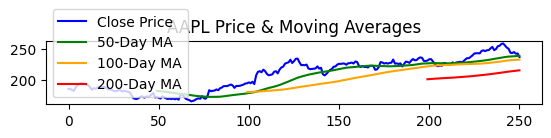

In [149]:
# Plot Closing Price and Moving Averages
plt.subplot(5, 1, 1)
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['50_MA'], label='50-Day MA', color='green')
plt.plot(data['100_MA'], label='100-Day MA', color='orange')
plt.plot(data['200_MA'], label='200-Day MA', color='red')
plt.title(f"{symbol} Price & Moving Averages")
plt.legend()

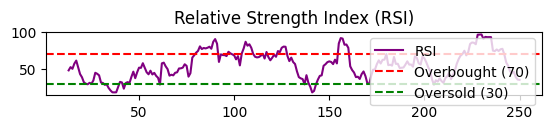

In [150]:
# Plot RSI
plt.subplot(5, 1, 2)
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title("Relative Strength Index (RSI)")
plt.legend()

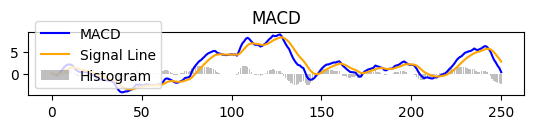

In [151]:
# Plot MACD
plt.subplot(5, 1, 3)
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['Signal_Line'], label='Signal Line', color='orange')
plt.bar(data.index, data['MACD'] - data['Signal_Line'], color='gray', alpha=0.5, label='Histogram')
plt.title("MACD")
plt.legend()

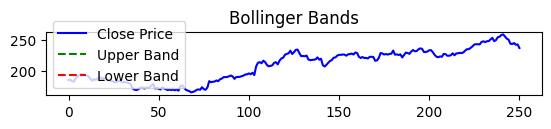

In [152]:
# Plot Bollinger Bands
plt.subplot(5, 1, 4)
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['Upper_Band'], label='Upper Band', color='green', linestyle='--')
plt.plot(data['Lower_Band'], label='Lower Band', color='red', linestyle='--')
plt.title("Bollinger Bands")
plt.legend()

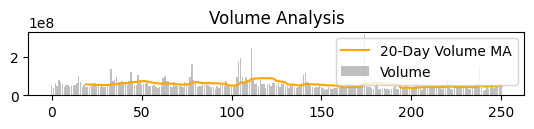

In [153]:
# Plot Volume
plt.subplot(5, 1, 5)
plt.bar(data.index, data['Volume'], label='Volume', color='gray', alpha=0.5)
plt.plot(data['Volume_MA'], label='20-Day Volume MA', color='orange')
plt.title("Volume Analysis")
plt.legend()

In [154]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [155]:
# Trend Analysis
bullish = False
if (data['50_MA'].iloc[-1] > data['100_MA'].iloc[-1] > data['200_MA'].iloc[-1]) and \
   (data['Close'].iloc[-1] > data['50_MA'].iloc[-1]) and \
   (data['RSI'].iloc[-1] < 70) and (data['RSI'].iloc[-1] > 50) and \
   (data['MACD'].iloc[-1] > data['Signal_Line'].iloc[-1]) and \
   (data['Close'].iloc[-1] > data['20_MA'].iloc[-1]):
    bullish = True

# Breakout Detection
breakout = False
if squeeze.iloc[-1] and data['Close'].iloc[-1] > data['Upper_Band'].iloc[-1] and \
   data['Volume'].iloc[-1] > 1.5 * data['Volume_MA'].iloc[-1]:
    breakout = True

In [156]:
# Print Analysis
print("Bullish Trend:", "YES" if bullish else "NO")
print("Breakout Detected:", "YES" if breakout else "NO")

Bullish Trend: NO
Breakout Detected: NO
